In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
from IPython.display import display
from datetime import datetime,  timedelta
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# Load the PANAS data from the csv file

def dateparse(x):

    if x and type(x) is str:
        return datetime.strptime(x, "%m/%d/%Y %H:%M:%S")
    else:
        return np.nan

with open('../data/feelings_training.csv', 'r') as fp:
    cl = NaiveBayesClassifier(fp, format="csv")

def get_sentiment(x):
    if type(x) is str:
        return TextBlob(x).sentiment.polarity

def get_custom_sentiment(x):
    if type(x) is str:
        result = cl.classify(x)
        if result=='pos':
            return 1
        elif result == 'neg':
            return -1
        return 0
#dateparse = lambda x:  datetime.strptime(x, "%m/%d/%Y %H:%M:%S") if x else np.nan

#load dataframe from csv
df = pd.read_csv("../data/panas_data_new.csv",parse_dates=['Timestamp'], date_parser=dateparse)

variable_dict = {
'Timestamp':'TIMESTAMP',
'Pair':'PAIR',
'Identifier': 'ID',
'Time of Day': 'WHEN_RECORDED',
'How many hours did you sleep last night? (beginning of day only)':	'SLEEP',
'Upset':'UPSET',
'Hostile':'HOSTILE',
'Alert':'ALERT',
'Ashamed':'ASHAMED',
'Inspired': 'INSPIRED',
'Nervous':'NERVOUS',
'Determined':'DETERMINED',
'Attentive':'ATTENTIVE',
'Afraid':'AFRAID',
'Active':'ACTIVE',
'Any comments / thoughts?':'COMMENTS',
'Positive':'POSITIVE_SCORE',
'Negative':'NEGATIVE_SCORE',
'Difference':'SCORE_DIFFERENCE'}

df_daily_emotion = df.rename(columns=variable_dict)
df_daily_emotion.dropna(how='all', axis=1, inplace=True)

# Before getting only the paired data, identify the total number of records
total_num_daily_emotion = len(df_daily_emotion)
df_daily_emotion = df_daily_emotion.loc[(~df_daily_emotion['PAIR'].isnull())]
df_daily_emotion = df_daily_emotion.sort_values(['PAIR','TIMESTAMP'])



# Descriptive Statistics

## Daily Emotion

In [461]:
### Number of Daily emotion records


In [462]:


#print("total daily emotion records: ", unique_pairs)

# want to ignore blank entries for the pairing so get them first

pairs_df = df_daily_emotion.groupby(['PAIR']).agg(num_pairs=pd.NamedAgg(column='PAIR', aggfunc='count'))
unique_pairs = len(pairs_df.loc[(pairs_df.num_pairs == 2)])

print('total daily emotion records', len(df_daily_emotion))
print('total paired start day/end of day daily emotion records',unique_pairs)

#print('total after break daily emotion records',len(df_clean.loc[(df_clean.WHEN_RECORDED == 'End of Day')]))


total daily emotion records 36
total paired start day/end of day daily emotion records 18


### Daily emotion scores

In [463]:

# count number of times day started positive
#df.loc[(df['col1'] == value) & (df['col2'] < value)]
pos_start_day = len(df_daily_emotion.loc[(df_daily_emotion.SCORE_DIFFERENCE > 0) & (df_daily_emotion.WHEN_RECORDED == 'Beginning of Day')])
neg_start_day = unique_pairs - pos_start_day
print("total positive morning: ", pos_start_day)
print("total negative morning: ", neg_start_day)

pos_end_day = len(df_daily_emotion.loc[(df_daily_emotion.SCORE_DIFFERENCE > 0) & (df_daily_emotion.WHEN_RECORDED == 'End of Day')])
neg_end_day = unique_pairs - pos_end_day
print("total positive night: ", pos_end_day)
print("total negative night: ", neg_end_day)

#print(df_clean.sort_values(['PAIR','TIMESTAMP']))
#print(df_clean[['TIMESTAMP','SCORE_DIFFERENCE']].diff())




total positive morning:  14
total negative morning:  4
total positive night:  12
total negative night:  6


### Differences in consecutive PANAS ratings

In [464]:
#now look at differences between start and end of day
df_daily_emotion['DELTA_PREV_DIFFERENCE'] = df_daily_emotion[['TIMESTAMP','SCORE_DIFFERENCE']].diff()['SCORE_DIFFERENCE']
#print(df_clean[['PAIR','WHEN_RECORDED','SCORE_DIFFERENCE','DELTA_PREV_DIFFERENCE']])
print('#Participants whose end of day total emotion had reduced since start of day: ', len(df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='End of Day') & (df_daily_emotion.DELTA_PREV_DIFFERENCE <0)]))

# and differences from start of day and end of previous night
print('#Participants whose start of day total emotion had increased since end of previous day: ', len(df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='Beginning of Day') & (df_daily_emotion.DELTA_PREV_DIFFERENCE >0)]))

print("Morning, PANAS Positive Scores:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='Beginning of Day')]['POSITIVE_SCORE'].agg({'mean','std','min','max'}))
print("Morning, PANAS Negative Scores:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='Beginning of Day')]['NEGATIVE_SCORE'].agg({'mean','std','min','max'}))
print("Morning, PANAS Positive-Negative:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='Beginning of Day')]['SCORE_DIFFERENCE'].agg({'mean','std','min','max'}))

print("Evening, PANAS Positive Scores:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='End of Day')]['POSITIVE_SCORE'].agg({'mean','std','min','max'}))
print("Evening, PANAS Negative Scores:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='End of Day')]['NEGATIVE_SCORE'].agg({'mean','std','min','max'}))
print("Evening, PANAS Positive-Negative:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='End of Day')]['SCORE_DIFFERENCE'].agg({'mean','std','min','max'}))


print("Evening, Difference to Start Day:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='End of Day')]['DELTA_PREV_DIFFERENCE'].agg({'mean','std','min','max'}))
print("Morning, Difference to previous day:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='Beginning of Day')]['DELTA_PREV_DIFFERENCE'].agg({'mean','std','min','max'}))



#Participants whose end of day total emotion had reduced since start of day:  14
#Participants whose start of day total emotion had increased since end of previous day:  12
Morning, PANAS Positive Scores: mean    13.111111
std      4.470674
min      7.000000
max     21.000000
Name: POSITIVE_SCORE, dtype: float64
Morning, PANAS Negative Scores: mean     7.222222
std      2.901431
min      5.000000
max     14.000000
Name: NEGATIVE_SCORE, dtype: float64
Morning, PANAS Positive-Negative: mean     5.888889
std      5.809616
min     -3.000000
max     16.000000
Name: SCORE_DIFFERENCE, dtype: float64
Evening, PANAS Positive Scores: mean     9.777778
std      2.981424
min      5.000000
max     14.000000
Name: POSITIVE_SCORE, dtype: float64
Evening, PANAS Negative Scores: mean     7.388889
std      2.872566
min      5.000000
max     15.000000
Name: NEGATIVE_SCORE, dtype: float64
Evening, PANAS Positive-Negative: mean    2.388889
std     4.031332
min    -5.000000
max     9.000000
Name: SCORE_DIFF

In [465]:

df_daily_emotion['SENTIMENT_COMMENTS'] = df_daily_emotion['COMMENTS'].apply(get_sentiment)

print("In morning, Sentiment on comment:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='Beginning of Day')]['SENTIMENT_COMMENTS'].agg({'mean','std','min','max'}))

print("In evening, Sentiment on comment:",df_daily_emotion.loc[(df_daily_emotion.WHEN_RECORDED =='End of Day')]['SENTIMENT_COMMENTS'].agg({'mean','std','min','max'}))

In morning, Sentiment on comment: mean   -0.040145
std     0.272770
min    -0.520000
max     0.228571
Name: SENTIMENT_COMMENTS, dtype: float64
In evening, Sentiment on comment: mean   -0.108333
std     0.291011
min    -0.450000
max     0.400000
Name: SENTIMENT_COMMENTS, dtype: float64


### Sleep distribution

In [466]:

print("Sleep distribution: mean {}, std {}, median {}, min {}, max {}".format(str(df_daily_emotion.SLEEP.mean()), str(df_daily_emotion.SLEEP.std()), str(df_daily_emotion.SLEEP.median()), str(df_daily_emotion.SLEEP.min()), str(df_daily_emotion.SLEEP.max())))


Sleep distribution: mean 6.870555555555556, std 0.879414726643754, median 7.0, min 6.0, max 8.0


In [467]:
# save the cleaned up data along with the emotion differences
df_daily_emotion.to_csv('../data/clean_daily_emotion.csv', index=False)

## Experience Sample Data

In [468]:
# now analyse the experience sample data
df_exp = pd.read_csv("../data/experience_sample_data_new.csv",parse_dates=[ 'Timestamp','Date and Time of activity'], date_parser=dateparse)

exp_variable_dict = {'Timestamp':'TIMESTAMP','Personal ID':'ID','Before-After break pairings':'PAIR','Before / After a break':'RELATION_BEAK','Duration of break activity (MINUTES)':'BREAK_DURATION', 'Current Perceived Stress Level':"PERCEIVED_STRESS",'Current Actual Stress Level':'GARMIN_STRESS','Activity Prior to Break Activity':'ACTIVITY_PRIOR_BREAK','Details of Break Activity':'BREAK_DETAILS','Was the break physically active?':'BREAK_PHYSICAL','Was the break indoors or outdoors?':'BREAK_LOCATION','Was the break alone or social?':'BREAK_SOCIAL','If it involved an electronic device, provide details':'BREAK_ELECTRONIC_DEVICE','Do you think the break activity helped?':'BREAK_HELPED','Date and Time of activity':'ACTUAL_ACTIVITY_TIME','Arousal/Valence [Aroused 2]':'AROUSAL_2','Arousal/Valence [Aroused 1]':'AROUSAL_1','Arousal/Valence [Aroused 0]':'AROUSAL_0','Arousal/Valence [Aroused -1]':'AROUSAL_-1','Arousal/Valence [Aroused -2]':'AROUSAL_-2','Adjectives / feelings':'FEELINGS','Why are you taking a break or why did you take a break?':'BREAK_REASON'}

# update columns names and remove the empty columns
df_clean_exp = df_exp.rename(columns=exp_variable_dict)
df_clean_exp.dropna(how='all', axis=1, inplace=True)
df_clean_exp['BREAK_ELECTRONIC_DEVICE'] = df_clean_exp['BREAK_ELECTRONIC_DEVICE'].replace(np.nan, '-')
df_clean_exp['BREAK_PHYSICAL'] = df_clean_exp['BREAK_PHYSICAL'].replace(np.nan, '-')
df_clean_exp['BREAK_LOCATION'] = df_clean_exp['BREAK_LOCATION'].replace(np.nan, '-')
df_clean_exp['BREAK_SOCIAL'] = df_clean_exp['BREAK_SOCIAL'].replace(np.nan, '-')
df_clean_exp = df_clean_exp.replace('High (76 - 100)',4)
df_clean_exp = df_clean_exp.replace('Medium (51 - 75)',3)
df_clean_exp = df_clean_exp.replace('Low (26 - 50)',2)
df_clean_exp = df_clean_exp.replace('Rest (0 - 25)',1)
df_clean_exp = df_clean_exp.replace('High',4)
df_clean_exp = df_clean_exp.replace('Medium',2)
df_clean_exp = df_clean_exp.replace('Low',2)
df_clean_exp = df_clean_exp.replace('Rest',1)
df_clean_exp = df_clean_exp.replace('Valence 2',2)
df_clean_exp = df_clean_exp.replace('Valence 1',1)
df_clean_exp = df_clean_exp.replace('Valence 0',0)
df_clean_exp = df_clean_exp.replace('Valence -1',-1)
df_clean_exp = df_clean_exp.replace('Valence -2',-2)






### Unique before/after reports

In [469]:
pairs_exp_df = df_clean_exp.groupby(['PAIR']).agg(num_pairs=pd.NamedAgg(column='PAIR', aggfunc='count'))
unique_exp_pairs = len(pairs_exp_df.loc[(pairs_exp_df.num_pairs == 2)])

print("total number of records: ", len(df_clean_exp))
print("unique pairs of before/after records: ", unique_exp_pairs)
print("total after break records:", len(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]))




total number of records:  110
unique pairs of before/after records:  45
total after break records: 54


### Break details

Break duration (minutes) distribution: mean 43.15942028985507, std 30.100626917648487, median 30.0, min 5.0, max 120.0


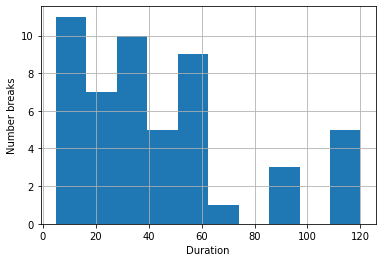

In [490]:
# avg break duration
print("Break duration (minutes) distribution: mean {}, std {}, median {}, min {}, max {}".format(str(df_clean_exp.BREAK_DURATION.mean()), str(df_clean_exp.BREAK_DURATION.std()), str(df_clean_exp.BREAK_DURATION.median()), str(df_clean_exp.BREAK_DURATION.min()), str(df_clean_exp.BREAK_DURATION.max())))

bins=[ -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 120, 150]

df['duration_bin'] = pd.cut(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['BREAK_DURATION'], bins)
#print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['BREAK_DURATION'])
#print(df['duration_bin'].value_counts())

ax = df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['BREAK_DURATION'].dropna().hist()



#ax.set_title('')
#ax.set_xlabel("Duration", labelpad=20, weight='bold', size=12)
#ax.set_ylabel("Number breaks", labelpad=20, weight='bold', size=12)
plt.xlabel("Duration")
plt.ylabel("Number breaks")
plt.savefig('../data/break_duration_hist.png')

In [486]:
# %age of breaks that involve physical activity
total_physical = len(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_PHYSICAL !='-')])

print("total non-zero physical or not records:", total_physical)

print()

print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_PHYSICAL !='-')].groupby(['BREAK_PHYSICAL'])['BREAK_PHYSICAL'].count().div(total_physical)*100)


total non-zero physical or not records: 46

BREAK_PHYSICAL
No         63.043478
Yes        34.782609
Yes, No     2.173913
Name: BREAK_PHYSICAL, dtype: float64


In [472]:
#%age breaks that are alone or with others
total_social = len(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_SOCIAL !='-')])
print("total non-zero social records:", total_social)
print()
print("%age breakdown of whether break was with others or not\n")
print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_SOCIAL !='-')].groupby(['BREAK_SOCIAL'])['BREAK_SOCIAL'].count().div(total_social)*100)

total non-zero social records: 48

%age breakdown of whether break was with others or not

BREAK_SOCIAL
Alone                 75.000000
Alone, With others    10.416667
With others           14.583333
Name: BREAK_SOCIAL, dtype: float64


In [473]:
# %age breaks that involve an electronic device
total_electronic = len(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_ELECTRONIC_DEVICE !='-')])

print("total non-zero electronic records:", total_electronic)
print()
print("%age of all breaks involving electronic devices:" ,total_electronic/total_social*100)
print()
print("%age breakdown of type of electronic device used\n")
print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_ELECTRONIC_DEVICE !='-')].groupby(['BREAK_ELECTRONIC_DEVICE'])['BREAK_ELECTRONIC_DEVICE'].count().div(total_electronic)*100)

total non-zero electronic records: 37

%age of all breaks involving electronic devices: 77.08333333333334

%age breakdown of type of electronic device used

BREAK_ELECTRONIC_DEVICE
Phone       70.270270
Tablet       5.405405
computer    24.324324
Name: BREAK_ELECTRONIC_DEVICE, dtype: float64


In [474]:
# %age breaks by location (indoors, outdoors, both)
total_location = len(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_LOCATION !='-')])

print("%age breakdown of break location\n")
print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_LOCATION !='-')].groupby(['BREAK_LOCATION'])['BREAK_LOCATION'].count().div(total_location)*100)

%age breakdown of break location

BREAK_LOCATION
Indoors                          60.416667
Mixture of indoor and outdoor    14.583333
Outdoors                         25.000000
Name: BREAK_LOCATION, dtype: float64


In [475]:
df_clean_exp['BREAK_ELECTRONIC_DEVICE'] = df_clean_exp['BREAK_ELECTRONIC_DEVICE'].replace(np.nan, '-')
df_clean_exp['BREAK_PHYSICAL'] = df_clean_exp['BREAK_PHYSICAL'].replace(np.nan, '-')
df_clean_exp['BREAK_LOCATION'] = df_clean_exp['BREAK_LOCATION'].replace(np.nan, '-')
df_clean_exp['BREAK_SOCIAL'] = df_clean_exp['BREAK_SOCIAL'].replace(np.nan, '-')

#print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')].groupby(['BREAK_PHYSICAL','BREAK_LOCATION','BREAK_SOCIAL','BREAK_ELECTRONIC_DEVICE'], dropna=False)['BREAK_ELECTRONIC_DEVICE'].count())

table = pd.pivot_table(data=df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break') & (df_clean_exp.BREAK_PHYSICAL !='-')],index=['BREAK_PHYSICAL','BREAK_LOCATION','BREAK_SOCIAL','BREAK_ELECTRONIC_DEVICE'], values=['ID'],aggfunc='count', dropna=True)

table['% Breaks'] = (table['ID']/table['ID'].sum())*100

print("Combination of break categories as %age of total breaks")

print(table['% Breaks'])

Combination of break categories as %age of total breaks
BREAK_PHYSICAL  BREAK_LOCATION                 BREAK_SOCIAL        BREAK_ELECTRONIC_DEVICE
No              Indoors                        Alone               Phone                      23.913043
                                                                   computer                   10.869565
                                               Alone, With others  Phone                       6.521739
                                               With others         Phone                       2.173913
                                                                   computer                    2.173913
                Mixture of indoor and outdoor  Alone               Phone                       2.173913
                                                                   computer                    2.173913
                Outdoors                       Alone               Phone                      10.869565
                     

### Reported and Perceived Stress Levels

In [476]:

print(df_clean_exp.groupby(['PERCEIVED_STRESS','GARMIN_STRESS'])['PERCEIVED_STRESS'].count())

print("Before Break, Perceived Stress:", df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')]['PERCEIVED_STRESS'].agg({'mean','std','min','max'}))
print("After Break, Perceived Stress:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['PERCEIVED_STRESS'].agg({'mean','std','min','max'}))
print("Before Break, Garmin Stress:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')]['GARMIN_STRESS'].agg({'mean','std','min','max'}))
print("After Break, Garmin Stress:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['GARMIN_STRESS'].agg({'mean','std','min','max'}))


PERCEIVED_STRESS  GARMIN_STRESS
1                 1                10
                  2                 1
                  3                 1
2                 1                24
                  2                41
                  3                15
                  4                14
4                 1                 2
                  3                 1
                  4                 1
Name: PERCEIVED_STRESS, dtype: int64
Before Break, Perceived Stress: mean    2.071429
std     0.499350
min     1.000000
max     4.000000
Name: PERCEIVED_STRESS, dtype: float64
After Break, Perceived Stress: mean    1.851852
std     0.491720
min     1.000000
max     4.000000
Name: PERCEIVED_STRESS, dtype: float64
Before Break, Garmin Stress: mean    2.125000
std     0.935414
min     1.000000
max     4.000000
Name: GARMIN_STRESS, dtype: float64
After Break, Garmin Stress: mean    2.074074
std     1.096338
min     1.000000
max     4.000000
Name: GARMIN_STRESS, dtype: float64


### Number breaks reports per day

In [477]:
# number breaks reported per day
print(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')].groupby([pd.Grouper(key="TIMESTAMP", freq="D"), 'ID'])['TIMESTAMP'].count())

TIMESTAMP   ID     
2022-05-13  Cameron    1
            Katie      1
2022-05-14  nadia      1
2022-05-15  nadia      2
2022-05-16  Cameron    2
            Katie      4
            VJ         2
            nadia      3
2022-05-17  Cameron    1
            Katie      3
            VJ         1
            nadia      1
            nadia      1
2022-05-18  Cameron    1
            Jason      2
            Katie      4
            VJ         1
            nadia      1
2022-05-19  Cameron    1
            Jason      3
            Katie      2
2022-05-20  Jason      2
            Katie      1
2022-05-21  VJ         2
2022-05-23  Cameron    2
            Jason      1
            Katie      4
            VJ         2
2022-05-24  Cameron    1
            Jason      1
Name: TIMESTAMP, dtype: int64


### Number after breaks reports per person

Break Start Time: mean    14.574074
std      4.328937
min      2.000000
max     23.000000
Name: HOURS, dtype: float64


<Figure size 432x288 with 0 Axes>

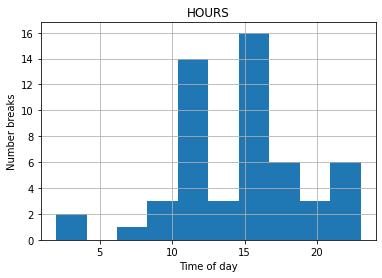

In [491]:
# Look at distribution of when in the day teh break took place
def calc_actual_activity_start_time(df_calc, x):

    duration = max(0, df_calc.iloc[x]['BREAK_DURATION'])

    break_time = df_calc.iloc[x]['ACTUAL_ACTIVITY_TIME'] if (df_calc.iloc[x]['ACTUAL_ACTIVITY_TIME'] and str(df_calc.iloc[x]['ACTUAL_ACTIVITY_TIME']) != 'NaT') else df_calc.iloc[x]['TIMESTAMP']

    # now just get the time part of the date and subtract the duration to get the start time
    start_time = break_time + timedelta(minutes = duration)
    return start_time

def calc_activity_start_time(df_calc):

    result = []
    for x in range(len(df_calc)):
        result.append(calc_actual_activity_start_time(df_calc,x))
    return result

df_clean_exp['ACTIVITY_START_TIME'] = calc_activity_start_time(df_clean_exp)

df_clean_exp['HOURS'] = df_clean_exp["ACTIVITY_START_TIME"].dt.hour

print("Break Start Time:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['HOURS'].agg({'mean','std','min','max'}))

plt.clf()
axarr = df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')].hist(column='HOURS', legend=False)

#ax = axarr[0]
#for x in ax:
#    x.set_title('')
#    x.set_xlabel("Time of Day", labelpad=20, weight='bold', size=12)
#    x.set_ylabel("Number breaks", labelpad=20, weight='bold', size=12)

plt.xlabel("Time of day")
plt.ylabel("Number breaks")
plt.savefig('../data/break_starttime_hist.png')

In [479]:


df_participant_group = df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')].groupby(['ID'])['ID'].agg('count')
print(df_participant_group)
total_break_participant =df_participant_group.sum()
avg_break_participant = df_participant_group.sum()/5
max_break = df_participant_group.max()
min_break = df_participant_group.min()
std_dev = pd.DataFrame({'A':[9,9,19,8,9]}).A.std()
print("total breaks: {} avg breaks {}, std {}, min breaks {}, max breaks {}".format(total_break_participant, avg_break_participant, str(std_dev), min_break, max_break))





ID
Cameron     9
Jason       9
Katie      19
VJ          8
nadia       8
nadia       1
Name: ID, dtype: int64
total breaks: 54 avg breaks 10.8, std 4.604345773288536, min breaks 1, max breaks 19


In [480]:
## Sentiment analysis

In [481]:

df_sentiment = df_clean_exp['BREAK_HELPED'].apply(get_sentiment)

df_clean_exp['SENTIMENT_BREAK_HELPED'] = df_clean_exp['BREAK_HELPED'].apply(get_sentiment)

# now calc the average sentiment, and the std deviation, ignore NaN
print("After Break, Sentiment break helped:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['SENTIMENT_BREAK_HELPED'].agg({'mean','std','min','max'}))

df_clean_exp['SENTIMENT_FEELINGS'] = df_clean_exp['FEELINGS'].apply(get_custom_sentiment)

# now calc the average sentiment, and the std deviation, ignore NaN
print("Sentiment distribution before break:".format(str(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')].SENTIMENT_FEELINGS.mean()), str(df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')].SENTIMENT_FEELINGS.std())))

print("Before Break, Sentiment feelings:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')]['SENTIMENT_FEELINGS'].agg({'mean','std','min','max'}))
print("After Break, Sentiment feelings:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['SENTIMENT_FEELINGS'].agg({'mean','std','min','max'}))

df_clean_exp.to_csv('../data/clean_experience_sample.csv', index=False)


After Break, Sentiment break helped: mean    0.15400
std     0.28687
min    -0.60000
max     0.80000
Name: SENTIMENT_BREAK_HELPED, dtype: float64
Sentiment distribution before break:
Before Break, Sentiment feelings: mean   -0.090909
std     1.005038
min    -1.000000
max     1.000000
Name: SENTIMENT_FEELINGS, dtype: float64
After Break, Sentiment feelings: mean    0.592593
std     0.813066
min    -1.000000
max     1.000000
Name: SENTIMENT_FEELINGS, dtype: float64


In [482]:
# now calculate the arousal and valence
# need to first get hold of the data
def calc_cols(df_calc, cols, x, is_index):
    for index, col_name in enumerate(cols):
        if (df_calc.iloc[x][col_name])>=-2:
            #print(index, col_name, x, df_calc.iloc[x][col_name])
            return index-2 if is_index else df_calc.iloc[x][col_name]

    return np.nan

def calc_valence_or_arousal(df_calc, valence):
    cols = ['AROUSAL_-2', 'AROUSAL_-1', 'AROUSAL_0','AROUSAL_1','AROUSAL_2']
    result = []
    for x in range(len(df_calc)):
        result.append(calc_cols(df_calc,cols,x,False if valence else True))
    return result

def calc_valence(df_calc):
    return calc_valence_or_arousal(df_calc, True)

def calc_arousal(df_calc):
      return calc_valence_or_arousal(df_calc, False)


df_clean_exp["AROUSAL"] = calc_arousal(df_clean_exp)
df_clean_exp["VALENCE"] = calc_valence(df_clean_exp)

print("Before Break, Arousal:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')]['AROUSAL'].agg({'mean','std','min','max'}))
print("After Break, Arousal:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['AROUSAL'].agg({'mean','std','min','max'}))

print("Before Break, Valence:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='Before break')]['VALENCE'].agg({'mean','std','min','max'}))
print("After Break, Valence:",df_clean_exp.loc[(df_clean_exp.RELATION_BEAK =='After break')]['VALENCE'].agg({'mean','std','min','max'}))






Before Break, Arousal: mean    0.418182
std     1.149733
min    -2.000000
max     2.000000
Name: AROUSAL, dtype: float64
After Break, Arousal: mean    0.018519
std     1.236104
min    -2.000000
max     2.000000
Name: AROUSAL, dtype: float64
Before Break, Valence: mean    0.018182
std     1.096981
min    -2.000000
max     2.000000
Name: VALENCE, dtype: float64
After Break, Valence: mean    0.537037
std     0.905183
min    -2.000000
max     2.000000
Name: VALENCE, dtype: float64
